In [30]:
from pathlib import Path
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import asreview
from asreview.models.balancers import Balanced
from asreview.models.classifiers import SVM
from asreview.models.feature_extractors import Tfidf
from asreview.models.queriers import Random, Max
from asreview.models.stoppers import IsFittable
from asreview.models.stoppers import NLabeled

from minimal import sample_minimal_priors
from llm import prepare_llm_datasets
from metrics import evaluate_simulation


from asreviewcontrib.insights.plot import _plot_recall

In [6]:
stop_at_n = 100
seed = 42

In [4]:
dataset = pd.read_csv(r'C:\Users\timov\Desktop\Utrecht\Utrecht\MSBBSS\thesis_timo\Synergy\synergy_dataset/Walker_2018.csv')

In [7]:
tfidf_kwargs = {
"ngram_range": (1, 2),
"sublinear_tf": True,
"max_df": 0.95,
"min_df": 1,
}

alc_no_prior = [
    asreview.ActiveLearningCycle(
        querier=Random(random_state=seed), 
        stopper=IsFittable()),
    asreview.ActiveLearningCycle(
        querier=Max(),
        classifier=SVM(C=0.11, loss="squared_hinge", random_state=seed),
        balancer=Balanced(ratio=9.8),
        feature_extractor=Tfidf(**tfidf_kwargs),
        stopper=NLabeled(stop_at_n)
    )
]


In [8]:
# # Run simulation without priors (random start)
simulate_no_priors = asreview.Simulate(X=dataset, labels=dataset["label_included"], cycles=alc_no_prior)
simulate_no_priors.review()

Records labeled       :   0%|          | 100/48375 [00:44<5:54:48,  2.27it/s]


Loss: 0.001
NDCG: 0.549


In [25]:
simulate_no_priors._results

,record_id,label,classifier,querier,balancer,feature_extractor,training_set,time,note,tags,user_id
0,47214,0,None,random,None,None,0,1.762255e+09,None,None,None
1,24936,0,None,random,None,None,1,1.762255e+09,None,None,None
2,11477,0,None,random,None,None,2,1.762255e+09,None,None,None
3,8037,0,None,random,None,None,3,1.762255e+09,None,None,None
4,8038,0,None,random,None,None,4,1.762255e+09,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
95,19532,1,svm,max,balanced,tfidf,95,1.762255e+09,None,None,None
96,997,0,svm,max,balanced,tfidf,96,1.762255e+09,None,None,None
97,41228,0,svm,max,balanced,tfidf,97,1.762255e+09,None,None,None
98,6149,0,svm,max,balanced,tfidf,98,1.762255e+09,None,None,None


In [67]:
simulation_results = simulate_no_priors._results.dropna(axis=0, subset="training_set")[:50]
simulation_results

,record_id,label,classifier,querier,balancer,feature_extractor,training_set,time,note,tags,user_id
0,47214,0,None,random,None,None,0,1.762255e+09,None,None,None
1,24936,0,None,random,None,None,1,1.762255e+09,None,None,None
2,11477,0,None,random,None,None,2,1.762255e+09,None,None,None
3,8037,0,None,random,None,None,3,1.762255e+09,None,None,None
4,8038,0,None,random,None,None,4,1.762255e+09,None,None,None
5,1792,0,None,random,None,None,5,1.762255e+09,None,None,None
6,22369,0,None,random,None,None,6,1.762255e+09,None,None,None
7,22370,0,None,random,None,None,7,1.762255e+09,None,None,None
8,22371,0,None,random,None,None,8,1.762255e+09,None,None,None
9,22368,0,None,random,None,None,9,1.762255e+09,None,None,None


In [22]:
df_cumsum = pd.DataFrame({'Minimal Priors': simulation_results["label"].cumsum()})

#drop first row
#df_cumsum = df_cumsum.iloc[1:]
df_cumsum

,Minimal Priors
0,0
1,0
2,0
3,0
4,0
...,...
95,29
96,29
97,29
98,29


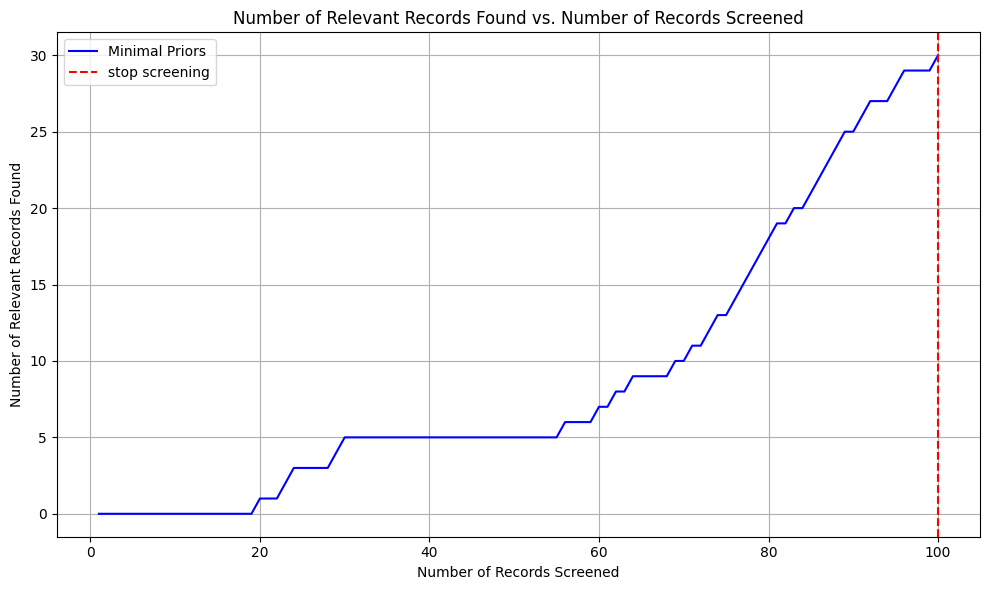

In [28]:
plt.figure(figsize=(10, 6))

# Use 1-based x-axis: screening 1 through stop_at_n
x_axis = range(1, len(df_cumsum['Minimal Priors'][:stop_at_n]) + 1)
plt.plot(x_axis, df_cumsum['Minimal Priors'][:stop_at_n], label='Minimal Priors', color='blue')

# Add dashed line at stop_at_n
plt.axvline(x=stop_at_n, color='red', linestyle='--', label='stop screening')

plt.xlabel('Number of Records Screened')
plt.ylabel('Number of Relevant Records Found')
plt.title('Number of Relevant Records Found vs. Number of Records Screened')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [77]:
raw_output = r'C:\Users\timov\Desktop\Utrecht\Utrecht\MSBBSS\thesis_timo\simulations\output_aggregate_recall\Donners_2021\raw_simulations'

minimal_runs = []
llm_runs = []
no_priors_runs = []

# loop over all csv files in raw_output
for file in Path(raw_output).glob('*.csv'):
    df = pd.read_csv(file)

    #drop the first rows if it contains NaN
    df = df.dropna(axis=0, subset=["training_set"])
    
    # check if the file is minimal priors, llm or no priors
    if 'minimal' in file.name:
        minimal_runs.append(df)
    elif 'llm' in file.name:
        llm_runs.append(df)
    elif 'no_priors' in file.name:
        no_priors_runs.append(df)


In [ ]:
# For each method, first calculate cumsum for each run, then compute mean and SEM across runs
minimal_cumsums = [df['label'].cumsum() for df in minimal_runs]
agg_minimal = pd.DataFrame({
    'Cumulative Sum': pd.concat(minimal_cumsums, axis=1).mean(axis=1),
    'SE': pd.concat(minimal_cumsums, axis=1).sem(axis=1)
})

llm_cumsums = [df['label'].cumsum() for df in llm_runs]
agg_llm = pd.DataFrame({
    'Cumulative Sum': pd.concat(llm_cumsums, axis=1).mean(axis=1),
    'SE': pd.concat(llm_cumsums, axis=1).sem(axis=1)
})

no_priors_cumsums = [df['label'].cumsum() for df in no_priors_runs]
agg_no_priors = pd.DataFrame({
    'Cumulative Sum': pd.concat(no_priors_cumsums, axis=1).mean(axis=1),
    'SE': pd.concat(no_priors_cumsums, axis=1).sem(axis=1)
})


# return all columns of dataframe

pd.set_option('display.max_rows', None)
print(llm_runs[2])

    record_id  label classifier querier  balancer feature_extractor  \
2          48      1        svm     max  balanced             tfidf   
3          40      0        svm     max  balanced             tfidf   
4         211      0        svm     max  balanced             tfidf   
5         107      0        svm     max  balanced             tfidf   
6          98      1        svm     max  balanced             tfidf   
7          81      1        svm     max  balanced             tfidf   
8         247      1        svm     max  balanced             tfidf   
9           6      1        svm     max  balanced             tfidf   
10        215      0        svm     max  balanced             tfidf   
11         90      0        svm     max  balanced             tfidf   
12        144      0        svm     max  balanced             tfidf   
13        236      1        svm     max  balanced             tfidf   
14        179      1        svm     max  balanced             tfidf   
15    

: 

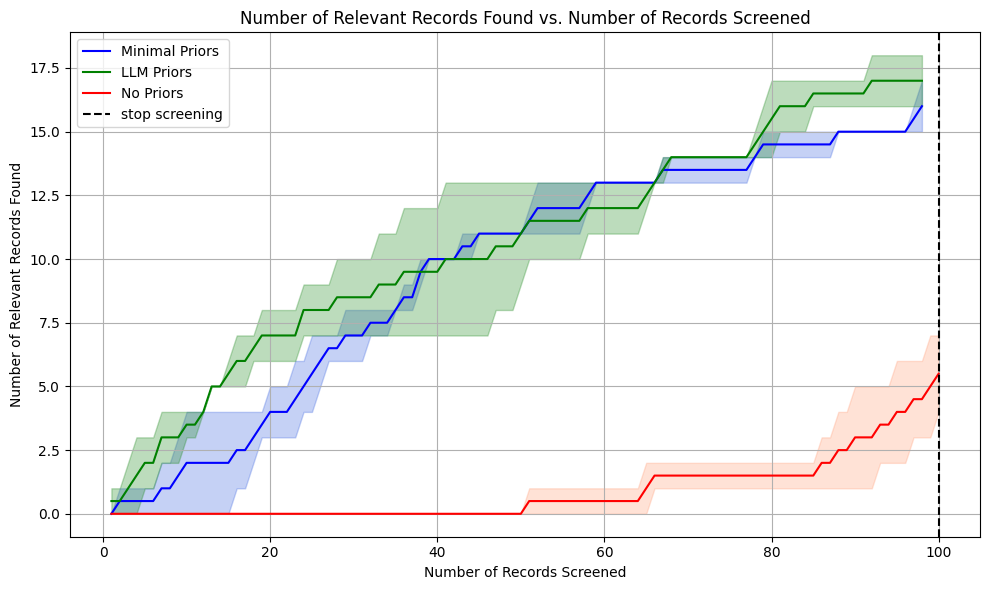

In [73]:
# plot the aggregated recall curves 

plt.figure(figsize=(10, 6))

# Use 1-based x-axis: screening 1 through stop_at_n
x_axis = range(1, len(agg_minimal['Cumulative Sum'][:stop_at_n]) + 1)
plt.plot(x_axis, agg_minimal['Cumulative Sum'][:stop_at_n], label='Minimal Priors', color='blue')
plt.fill_between(x_axis, agg_minimal['Cumulative Sum'][:stop_at_n] - agg_minimal['SE'][:stop_at_n], agg_minimal['Cumulative Sum'][:stop_at_n] + agg_minimal['SE'][:stop_at_n], color='royalblue', alpha=0.3)

x_axis = range(1, len(agg_llm['Cumulative Sum'][:stop_at_n]) + 1)
plt.plot(x_axis, agg_llm['Cumulative Sum'][:stop_at_n], label='LLM Priors', color='green')
plt.fill_between(x_axis, agg_llm['Cumulative Sum'][:stop_at_n] - agg_llm['SE'][:stop_at_n], agg_llm['Cumulative Sum'][:stop_at_n] + agg_llm['SE'][:stop_at_n], color='forestgreen', alpha=0.3)

x_axis = range(1, len(agg_no_priors['Cumulative Sum'][:stop_at_n]) + 1)
plt.plot(x_axis, agg_no_priors['Cumulative Sum'][:stop_at_n], label='No Priors', color='red')
plt.fill_between(x_axis, agg_no_priors['Cumulative Sum'][:stop_at_n] - agg_no_priors['SE'][:stop_at_n], agg_no_priors['Cumulative Sum'][:stop_at_n] + agg_no_priors['SE'][:stop_at_n], color='lightsalmon', alpha=0.3)

# Add dashed line at stop_at_n
plt.axvline(x=stop_at_n, color='black', linestyle='--', label='stop screening')

plt.xlabel('Number of Records Screened')
plt.ylabel('Number of Relevant Records Found')
plt.title('Number of Relevant Records Found vs. Number of Records Screened')
plt.legend()
plt.grid(True)
plt.tight_layout()

